Model LSTM

Dùng dataset trong tập thư viện của nltk

MODEL1

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import twitter_samples
import nltk
import numpy as np

# Tải và tiền xử lý dữ liệu Twitter 
tweets = twitter_samples.strings('positive_tweets.json') + twitter_samples.strings('negative_tweets.json')
labels = [1] * len(twitter_samples.strings('positive_tweets.json')) + [0] * len(twitter_samples.strings('negative_tweets.json'))

# Tokenize dữ liệu văn bản
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Chuyển đổi danh sách Python thành NumPy arrays
X = np.array(padded_sequences)
y = np.array(labels)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình LSTM
model = keras.Sequential([
    keras.layers.Embedding(input_dim=5000, output_dim=64, input_length=100),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(64),
    keras.layers.Dense(1, activation='sigmoid')  
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history=model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Độ chính xác của mô hình LSTM:", test_accuracy)

Epoch 1/10
113/113 [==============================] - 20s 156ms/step - loss: 0.6937 - accuracy: 0.4957 - val_loss: 0.6939 - val_accuracy: 0.4737
Epoch 2/10
113/113 [==============================] - 17s 151ms/step - loss: 0.6933 - accuracy: 0.4929 - val_loss: 0.6933 - val_accuracy: 0.4737
Epoch 3/10
113/113 [==============================] - 17s 154ms/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6936 - val_accuracy: 0.4737
Epoch 4/10
113/113 [==============================] - 17s 149ms/step - loss: 0.6932 - accuracy: 0.5057 - val_loss: 0.6927 - val_accuracy: 0.5263
Epoch 5/10
113/113 [==============================] - 17s 151ms/step - loss: 0.6933 - accuracy: 0.4929 - val_loss: 0.6930 - val_accuracy: 0.5263
Epoch 6/10
113/113 [==============================] - 17s 152ms/step - loss: 0.6933 - accuracy: 0.4851 - val_loss: 0.6930 - val_accuracy: 0.5263
Epoch 7/10
113/113 [==============================] - 17s 152ms/step - loss: 0.6933 - accuracy: 0.5046 - val_loss: 0.6944 - val_ac

MODEL 2

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import twitter_samples
import nltk
import numpy as np

# Tải và tiền xử lý dữ liệu Twitter (tương tự các ví dụ trước)
nltk.download('twitter_samples')
tweets = twitter_samples.strings('positive_tweets.json') + twitter_samples.strings('negative_tweets.json')
labels = [1] * len(twitter_samples.strings('positive_tweets.json')) + [0] * len(twitter_samples.strings('negative_tweets.json'))

# Tokenize dữ liệu văn bản
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Chuyển đổi danh sách Python thành NumPy arrays
X = np.array(padded_sequences)
y = np.array(labels)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình
model = keras.Sequential([
    keras.layers.Embedding(input_dim=5000, output_dim=64, input_length=100),
    keras.layers.GRU(128,activation='tanh', return_sequences=True),
    keras.layers.GRU(128,activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
])


# Cấu hình mô hình
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
history=model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Độ chính xác của mô hình LSTM:", test_accuracy)

[nltk_data] Downloading package twitter_samples to C:\Users\MSI Bravo
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


Epoch 1/10
113/113 [==============================] - 18s 137ms/step - loss: 0.6935 - accuracy: 0.5007 - val_loss: 0.6923 - val_accuracy: 0.5263
Epoch 2/10
113/113 [==============================] - 15s 134ms/step - loss: 0.6934 - accuracy: 0.4896 - val_loss: 0.6933 - val_accuracy: 0.4737
Epoch 3/10
113/113 [==============================] - 16s 139ms/step - loss: 0.6933 - accuracy: 0.4968 - val_loss: 0.6937 - val_accuracy: 0.4737
Epoch 4/10
113/113 [==============================] - 16s 139ms/step - loss: 0.6932 - accuracy: 0.4954 - val_loss: 0.6931 - val_accuracy: 0.5263
Epoch 5/10
113/113 [==============================] - 15s 136ms/step - loss: 0.6933 - accuracy: 0.4904 - val_loss: 0.6932 - val_accuracy: 0.4737
Epoch 6/10
113/113 [==============================] - 15s 136ms/step - loss: 0.6933 - accuracy: 0.4935 - val_loss: 0.6933 - val_accuracy: 0.4737
Epoch 7/10
113/113 [==============================] - 15s 136ms/step - loss: 0.6934 - accuracy: 0.4957 - val_loss: 0.6936 - val_ac

đồ thị

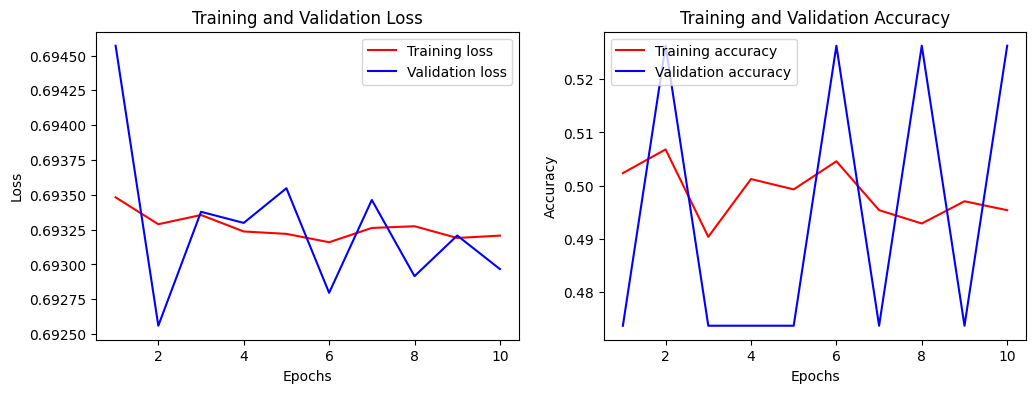

In [3]:
import matplotlib.pyplot as plt


# Trích xuất thông tin về hàm mất mát và độ chính xác từ lịch sử
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Số lượng epochs
epochs = range(1, len(loss) + 1)

# Vẽ đồ thị hàm mất mát (loss) màu đỏ
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Vẽ đồ thị độ chính xác (accuracy) màu xanh
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Hiển thị đồ thị
plt.show()

MODEL 3

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Input, LSTM, GlobalMaxPool1D
from tensorflow.keras.models import Model
from nltk.corpus import twitter_samples
import nltk
import numpy as np

# Tải và tiền xử lý dữ liệu Twitter (tương tự các ví dụ trước)
nltk.download('twitter_samples')
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = positive_tweets + negative_tweets
labels = [1] * len(positive_tweets) + [0] * len(negative_tweets)

# Tokenize dữ liệu văn bản
tokenizer = nltk.tokenize.TweetTokenizer()
tweets = [" ".join(tokenizer.tokenize(tweet)) for tweet in tweets]

# Tokenizer dựa trên số lượng từ vựng
max_features = 5000
tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(tweets)
tweets = tokenizer.texts_to_sequences(tweets)

# Chuyển đổi danh sách Python thành NumPy arrays
tweets = keras.preprocessing.sequence.pad_sequences(tweets, maxlen=100, padding='post', truncating='post')
X = np.array(tweets)
y = np.array(labels)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình theo cấu trúc tương tự với Model_A
def create_model():
    max_length = 100
    max_features = 5000
    embed_size = 128

    inp = Input(shape=(max_length,))
    x = Embedding(max_features, embed_size)(inp)
    x = LSTM(60, return_sequences=True, name='lstm_layer')(x)
    x = GlobalMaxPool1D()(x)
    x = Dropout(0.1)(x)
    x = Dense(50, activation="relu")(x)
    x = Dropout(0.1)(x)
    x = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

model = create_model()

# Cấu hình mô hình
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Độ chính xác của mô hình:", test_accuracy)



[nltk_data] Downloading package twitter_samples to C:\Users\MSI Bravo
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


Epoch 1/10
113/113 [==============================] - 6s 44ms/step - loss: 0.6930 - accuracy: 0.5049 - val_loss: 0.6931 - val_accuracy: 0.4762
Epoch 2/10
113/113 [==============================] - 4s 39ms/step - loss: 0.6926 - accuracy: 0.5149 - val_loss: 0.6927 - val_accuracy: 0.5175
Epoch 3/10
113/113 [==============================] - 4s 38ms/step - loss: 0.6927 - accuracy: 0.5210 - val_loss: 0.6926 - val_accuracy: 0.5425
Epoch 4/10
113/113 [==============================] - 4s 39ms/step - loss: 0.6925 - accuracy: 0.5383 - val_loss: 0.6925 - val_accuracy: 0.5425
Epoch 5/10
113/113 [==============================] - 5s 41ms/step - loss: 0.6924 - accuracy: 0.5271 - val_loss: 0.6923 - val_accuracy: 0.5875
Epoch 6/10
113/113 [==============================] - 4s 39ms/step - loss: 0.6922 - accuracy: 0.5525 - val_loss: 0.6922 - val_accuracy: 0.5800
Epoch 7/10
113/113 [==============================] - 4s 39ms/step - loss: 0.6921 - accuracy: 0.5575 - val_loss: 0.6921 - val_accuracy: 0.5550

MODEL4

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dropout, Dense, Input
from tensorflow.keras.models import Model
from nltk.corpus import twitter_samples
import nltk
import numpy as np

# Tải và tiền xử lý dữ liệu Twitter (tương tự các ví dụ trước)
nltk.download('twitter_samples')
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = positive_tweets + negative_tweets
labels = [1] * len(positive_tweets) + [0] * len(negative_tweets)

# Tokenize dữ liệu văn bản
tokenizer = nltk.tokenize.TweetTokenizer()
tweets = [" ".join(tokenizer.tokenize(tweet)) for tweet in tweets]

# Tokenizer dựa trên số lượng từ vựng
max_features = 5000
tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(tweets)
tweets = tokenizer.texts_to_sequences(tweets)

# Chuyển đổi danh sách Python thành NumPy arrays
tweets = keras.preprocessing.sequence.pad_sequences(tweets, maxlen=100, padding='post', truncating='post')
X = np.array(tweets)
y = np.array(labels)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình theo cấu trúc tương tự với Model_B
def create_model():
    max_length = 100
    max_features = 5000

    inp = Input(shape=(max_length,))
    x = Embedding(max_features, 128)(inp)
    x = SpatialDropout1D(0.25)(x)
    x = LSTM(100, dropout=0.5)(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model_b = create_model()

# Cấu hình mô hình
model_b.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
history_b = model_b.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Đánh giá mô hình
test_loss, test_accuracy = model_b.evaluate(X_test, y_test)
print("Độ chính xác của mô hình Model_B:", test_accuracy)


[nltk_data] Downloading package twitter_samples to C:\Users\MSI Bravo
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


Epoch 1/10
100/100 [==============================] - 28s 271ms/step - loss: 0.6948 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.4963
Epoch 2/10
100/100 [==============================] - 28s 282ms/step - loss: 0.6939 - accuracy: 0.4973 - val_loss: 0.6933 - val_accuracy: 0.5038
Epoch 3/10
100/100 [==============================] - 27s 274ms/step - loss: 0.6942 - accuracy: 0.4870 - val_loss: 0.6932 - val_accuracy: 0.4963
Epoch 4/10
100/100 [==============================] - 28s 281ms/step - loss: 0.6937 - accuracy: 0.4966 - val_loss: 0.6936 - val_accuracy: 0.4963
Epoch 5/10
100/100 [==============================] - 28s 277ms/step - loss: 0.6937 - accuracy: 0.4963 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 6/10
100/100 [==============================] - 28s 282ms/step - loss: 0.6932 - accuracy: 0.5097 - val_loss: 0.6938 - val_accuracy: 0.4963
Epoch 7/10
100/100 [==============================] - 28s 282ms/step - loss: 0.6935 - accuracy: 0.5005 - val_loss: 0.6951 - val_ac

Lưu model

In [18]:
model.save('sentiment_model_lstm.h5')

B:\python\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
import pickle

# Lưu tokenizer vào một tệp
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

kiểm tra bằng một chuỗi văn bản bất kỳ

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# Tải mô hình đã lưu
model = tf.keras.models.load_model('sentiment_model_lstm.h5')

# Tải tokenizer đã lưu
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Hàm để kiểm tra tính cực của một chuỗi đầu vào
def predict_sentiment(input_text, model, tokenizer):
    # Tiền xử lý và mã hóa chuỗi đầu vào
    input_sequence = tokenizer.texts_to_sequences([input_text])
    padded_sequence = pad_sequences(input_sequence, maxlen=100, padding='post', truncating='post')

    # Dự đoán trạng thái
    prediction = model.predict(padded_sequence)

    # Lấy trạng thái có xác suất cao nhất
    predicted_label = tf.argmax(prediction, axis=1).numpy()[0]

    # Xác định trạng thái dự đoán
    if predicted_label < 0.5:
        return "Tiêu cực"
    elif predicted_label > 0.5:
        return "Tích cực"
    else:
        return "Trung lập"

# Nhập chuỗi từ bàn phím và kiểm tra trạng thái
input_text = input("Nhập một chuỗi văn bản: ")
sentiment = predict_sentiment(input_text, model, tokenizer)
print(f"Chuỗi '{input_text}' được phân loại là: {sentiment}")


Nhập một chuỗi văn bản:  dddđ


1/1 [==============================] - 0s 482ms/step
Chuỗi 'dddđ' được phân loại là: Tiêu cực


In [23]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, GlobalMaxPool1D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Đường dẫn đến thư mục chứa dữ liệu
data_folder = 'data_train/train'

# Tạo danh sách chứa văn bản và nhãn
texts = []
labels = []

# Duyệt qua các tệp trong thư mục "pos" và "neg" để đọc dữ liệu
for label, folder in enumerate(['pos', 'neg']):
    folder_path = os.path.join(data_folder, folder)
    for filename in os.listdir(folder_path):
        with open(os.path.join(folder_path, filename), "r", encoding="utf-8") as file:
            text = file.read()
            texts.append(text)
            labels.append(label)

# Token hóa dữ liệu văn bản
max_features = 5000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Mã hóa nhãn
y = np.array(labels)

# Padding để có cùng độ dài
max_length = 200
X = pad_sequences(sequences, maxlen=max_length, padding='post')

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình
def create_model():
    embed_size = 128
    inp = Input(shape=(max_length,))
    x = Embedding(max_features, embed_size)(inp)
    x = LSTM(60, return_sequences=True, name='lstm_layer')(x)
    x = GlobalMaxPool1D()(x)
    x = Dropout(0.1)(x)
    x = Dense(50, activation="relu")(x)
    x = Dropout(0.1)(x)
    x = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1)

# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Độ chính xác của mô hình:", test_accuracy)


Epoch 1/50
3/3 [==============================] - 3s 254ms/step - loss: 0.6964 - accuracy: 0.3987 - val_loss: 0.6924 - val_accuracy: 0.5556
Epoch 2/50
3/3 [==============================] - 0s 98ms/step - loss: 0.6889 - accuracy: 0.7215 - val_loss: 0.6920 - val_accuracy: 0.6111
Epoch 3/50
3/3 [==============================] - 0s 101ms/step - loss: 0.6841 - accuracy: 0.8797 - val_loss: 0.6914 - val_accuracy: 0.7222
Epoch 4/50
3/3 [==============================] - 0s 98ms/step - loss: 0.6788 - accuracy: 0.9367 - val_loss: 0.6901 - val_accuracy: 0.7778
Epoch 5/50
3/3 [==============================] - 0s 101ms/step - loss: 0.6722 - accuracy: 0.9620 - val_loss: 0.6881 - val_accuracy: 0.7778
Epoch 6/50
3/3 [==============================] - 0s 104ms/step - loss: 0.6633 - accuracy: 0.9747 - val_loss: 0.6848 - val_accuracy: 0.7778
Epoch 7/50
3/3 [==============================] - 0s 103ms/step - loss: 0.6528 - accuracy: 0.9684 - val_loss: 0.6802 - val_accuracy: 0.7778
Epoch 8/50
3/3 [======

In [2]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 lstm_layer (LSTM)           (None, 200, 60)           45360     
                                                                 
 global_max_pooling1d (Glob  (None, 60)                0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 50)                3050      
                                                             

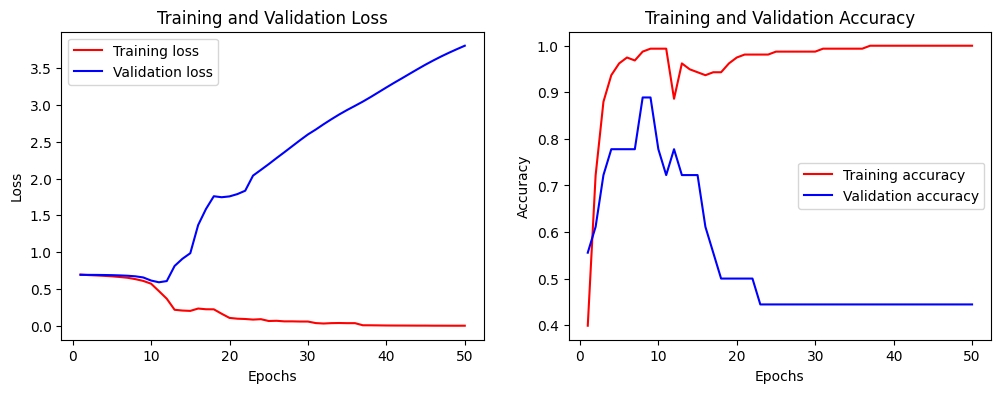

In [24]:
import matplotlib.pyplot as plt


# Trích xuất thông tin về hàm mất mát và độ chính xác từ lịch sử
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Số lượng epochs
epochs = range(1, len(loss) + 1)

# Vẽ đồ thị hàm mất mát (loss) màu đỏ
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Vẽ đồ thị độ chính xác (accuracy) màu xanh
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Hiển thị đồ thị
plt.show()

In [25]:
# Lưu mô hình
model.save("oksentiment_model.h5")


B:\python\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tải lại mô hình đã lưu từ tệp .h5
loaded_model = load_model("oksentiment_model.h5")

# Tạo tokenizer để tiền xử lý dữ liệu văn bản
max_features = 5000
tokenizer = Tokenizer(num_words=max_features)

# Nhập đoạn văn bản từ bàn phím
input_text = input("Nhập đoạn văn bản: ")

# Tiền xử lý và mã hóa đoạn văn bản
input_text = [input_text]
input_text = tokenizer.texts_to_sequences(input_text)
input_text = pad_sequences(input_text, maxlen=200, padding='post', truncating='post')

# Dự đoán tính cảm của đoạn văn bản
prediction = loaded_model.predict(input_text)

# Kiểm tra dự đoán và in kết quả
if prediction >=0.5:
    print("Chuỗi này được dự đoán là tích cực.")
else:
    print("Chuỗi này được dự đoán là tiêu cực.")
    
print("Giá trị dự đoán:", prediction)

Nhập đoạn văn bản:  tôi thích quán ăn này


1/1 [==============================] - 0s 261ms/step
Chuỗi này được dự đoán là tiêu cực.
Giá trị dự đoán: [[0.00151849]]


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GlobalAveragePooling1D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Đường dẫn đến thư mục chứa dữ liệu
data_folder = 'data_train/train'

# Tạo danh sách chứa văn bản và nhãn
texts = []
labels = []

# Duyệt qua các tệp trong thư mục "pos" và "neg" để đọc dữ liệu
for label, folder in enumerate(['pos', 'neg']):
    folder_path = os.path.join(data_folder, folder)
    for filename in os.listdir(folder_path):
        with open(os.path.join(folder_path, filename), "r", encoding="utf-8") as file:
            text = file.read()
            texts.append(text)
            labels.append(label)

# Token hóa dữ liệu văn bản
max_features = 5000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Mã hóa nhãn
y = np.array(labels)

# Padding để có cùng độ dài
max_length = 100
X = pad_sequences(sequences, maxlen=max_length, padding='post')

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình
def create_model():
    embed_size = 128
    inp = Input(shape=(max_length,))
    x = Embedding(max_features, embed_size)(inp)
    x = Bidirectional(LSTM(60, return_sequences=True, dropout=0.1))(x)
    x = Bidirectional(LSTM(60, return_sequences=True))(x)
    x = GlobalAveragePooling1D()(x)
    x = Dense(50, activation="relu")(x)
    x = Dropout(0.1)(x)
    x = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Độ chính xác của mô hình:", test_accuracy)



Epoch 1/10
338/338 [==============================] - 48s 131ms/step - loss: 0.3659 - accuracy: 0.8390 - val_loss: 0.3125 - val_accuracy: 0.8633
Epoch 2/10
338/338 [==============================] - 46s 136ms/step - loss: 0.2642 - accuracy: 0.8988 - val_loss: 0.2988 - val_accuracy: 0.8746
Epoch 3/10
338/338 [==============================] - 46s 136ms/step - loss: 0.2279 - accuracy: 0.9135 - val_loss: 0.3184 - val_accuracy: 0.8750
Epoch 4/10
338/338 [==============================] - 47s 139ms/step - loss: 0.1963 - accuracy: 0.9272 - val_loss: 0.3418 - val_accuracy: 0.8675
Epoch 5/10
338/338 [==============================] - 47s 139ms/step - loss: 0.1779 - accuracy: 0.9348 - val_loss: 0.3371 - val_accuracy: 0.8600
Epoch 6/10
338/338 [==============================] - 49s 143ms/step - loss: 0.1564 - accuracy: 0.9436 - val_loss: 0.4159 - val_accuracy: 0.8604
Epoch 7/10
338/338 [==============================] - 48s 141ms/step - loss: 0.1442 - accuracy: 0.9486 - val_loss: 0.4023 - val_ac

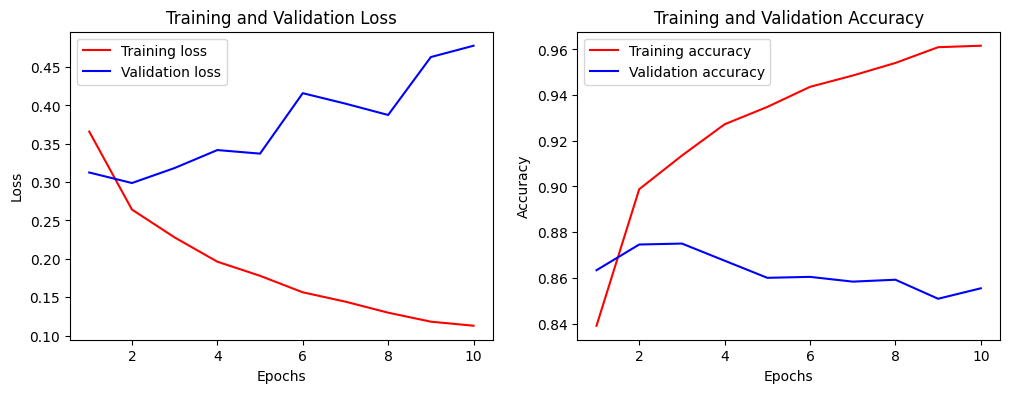

In [5]:
import matplotlib.pyplot as plt


# Trích xuất thông tin về hàm mất mát và độ chính xác từ lịch sử
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Số lượng epochs
epochs = range(1, len(loss) + 1)

# Vẽ đồ thị hàm mất mát (loss) màu đỏ
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Vẽ đồ thị độ chính xác (accuracy) màu xanh
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Hiển thị đồ thị
plt.show()

Sử dụng mộ bộ dữ liệu mới

In [11]:
train_data = pd.read_csv('data/nlp_train.csv')
df_valid = pd.read_csv('data/nlp_valid.csv')
df_test = pd.read_csv('data/nlp_test.csv')

In [10]:
import pandas as pd

# Read the CSV file into a DataFrame
train_data = pd.read_csv('data/nlp_train.csv')

# Display information about the DataFrame
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1493 non-null   int64 
 1   text          1493 non-null   object
 2   anger         1493 non-null   int64 
 3   anticipation  1493 non-null   int64 
 4   disgust       1493 non-null   int64 
 5   fear          1493 non-null   int64 
 6   joy           1493 non-null   int64 
 7   love          1493 non-null   int64 
 8   optimism      1493 non-null   int64 
 9   pessimism     1493 non-null   int64 
 10  sadness       1493 non-null   int64 
 11  surprise      1493 non-null   int64 
 12  trust         1493 non-null   int64 
 13  neutral       1493 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 163.4+ KB


In [12]:
# Tạo tóm tắt về độ dài của các chuỗi trong cột "text"
text_length_summary = train_data['text'].str.len().describe()

# In tóm tắt
print(text_length_summary)


count     1493.000000
mean      2926.933021
std       2174.145410
min        105.000000
25%       1271.000000
50%       2306.000000
75%       4079.000000
max      10208.000000
Name: text, dtype: float64


In [13]:
# Tìm chiều dài dài nhất trong cột "text"
max_length = train_data['text'].str.len().max()

# Trích xuất câu dài nhất
longest_sentence = train_data[train_data['text'].str.len() == max_length]['text'].values[0]

print("Câu dài nhất:")
print(longest_sentence)


Câu dài nhất:
Article text:
 
&gt; As the leader of the World Health Organization team that visited China, Dr. Bruce Aylward feels he has been to the mountaintop — and has seen what’s possible.
&gt; 
&gt; During a two-week visit in early February, Dr. Aylward saw how China rapidly suppressed the coronavirus outbreak that had engulfed Wuhan, and was threatening the rest of the country.
&gt; 
&gt; New cases in China have dropped to about 200 a day, from more than 3,000 in early February. The numbers may rise again as China’s economy begins to revive. But for now, far more new cases are appearing elsewhere in the world.
&gt; 
&gt; China’s counterattack can be replicated, Dr. Aylward said, but it will require speed, money, imagination and political courage.
&gt; 
&gt; For countries that act quickly, containment is still possible “because we don’t have a global pandemic — we have outbreaks occurring globally,” he added.
&gt; 
&gt; Dr. Aylward, who has 30 years experience in fighting polio, 

In [2]:
from bs4 import BeautifulSoup
import re

def clean_sentences(df):
    reviews = []

    for sent in tqdm(df['text']):
        
        #remove html content
        review_text = BeautifulSoup(sent).get_text()
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #tokenize the sentences
        words = word_tokenize(review_text.lower())
    
        #lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in words]
    
        reviews.append(lemma_words)

    return(reviews)

In [28]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, GlobalMaxPool1D, Dropout, Dense, Input, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


df_train = pd.read_csv('data/nlp_train.csv')
df_valid = pd.read_csv('data/nlp_valid.csv')
df_test = pd.read_csv('data/nlp_test.csv')

df_train = clean_sentences(df)
# Tiền xử lý dữ liệu
df_train = df_train.dropna(subset=['text'])
df_valid = df_valid.dropna(subset=['text'])

input_data_train = df_train['text']
input_data_val = df_valid['text']

# Tokenizer và Padding
tokenizer_data = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer_data.fit_on_texts(input_data_train)

tokenized_data_train = tokenizer_data.texts_to_sequences(input_data_train)
vec_data_train = pad_sequences(tokenized_data_train, padding='post', maxlen=250)

tokenized_data_val = tokenizer_data.texts_to_sequences(input_data_val)
vec_data_val = pad_sequences(tokenized_data_val, padding='post', maxlen=250)

data_vocab_size = len(tokenizer_data.word_index) + 1
print("Input vector training: ", vec_data_train.shape)
print("Input vector val: ", vec_data_val.shape)
print("Vocabulary size: ", data_vocab_size)

# Xác định nhãn
label_class = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust', 'neutral']
label_data_train = df_train[label_class].values
label_data_val = df_valid[label_class].values

# Xây dựng mô hình
dropout_threshold = 0.4
model = Sequential()
input_dim = data_vocab_size
output_dim = 60
input_length = 250

model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))
model.add(Bidirectional(LSTM(units=output_dim, dropout=dropout_threshold, return_sequences=True), merge_mode='concat'))
model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(50, activation='relu'))
model.add(Dense(12, activation='sigmoid'))

adam = Adam(learning_rate=0.001)
binary_accuracy = tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=[binary_accuracy])
model.summary()

# Huấn luyện mô hình
history = model.fit(
    x=vec_data_train, y=label_data_train,
    epochs=50,
    validation_data=(vec_data_val, label_data_val)
)

Input vector training:  (1493, 250)
Input vector val:  (165, 250)
Vocabulary size:  34232
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 250, 60)           2053920   
                                                                 
 bidirectional_2 (Bidirecti  (None, 250, 120)          58080     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 250, 120)          86880     
 onal)                                                           
                                                                 
 global_max_pooling1d_4 (Gl  (None, 120)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_13 (Dense)            (

In [29]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Assuming you have already trained the model as in your provided code

# Predict labels for the validation data
predictions = model.predict(vec_data_val)

# Threshold predictions (you may need to adjust this threshold)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

# Calculate evaluation metrics
classification_rep = classification_report(label_data_val, binary_predictions, target_names=label_class)

# Calculate accuracy
accuracy = accuracy_score(label_data_val, binary_predictions)

# Calculate ROC-AUC score (for each class separately)
roc_auc_scores = []
for i in range(len(label_class)):
    roc_auc = roc_auc_score(label_data_val[:, i], predictions[:, i])
    roc_auc_scores.append(roc_auc)

# Print the results
print("Classification Report:\n", classification_rep)
print("Accuracy:", accuracy)
for i, class_name in enumerate(label_class):
    print(f"ROC-AUC for {class_name}: {roc_auc_scores[i]}")


6/6 [==============================] - 1s 50ms/step
Classification Report:
               precision    recall  f1-score   support

       anger       0.89      0.94      0.91        66
anticipation       0.94      0.91      0.92        88
     disgust       0.90      0.97      0.94        75
        fear       0.99      0.98      0.98        92
         joy       0.59      0.71      0.65        14
        love       0.44      0.27      0.33        15
    optimism       0.80      0.67      0.73        52
   pessimism       0.88      0.85      0.86        78
     sadness       0.83      0.80      0.82        50
    surprise       0.50      0.12      0.20        24
       trust       0.78      0.64      0.70        22
     neutral       0.95      1.00      0.98        20

   micro avg       0.88      0.83      0.86       596
   macro avg       0.79      0.74      0.75       596
weighted avg       0.86      0.83      0.84       596
 samples avg       0.87      0.83      0.84       596

Acc

B:\python\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


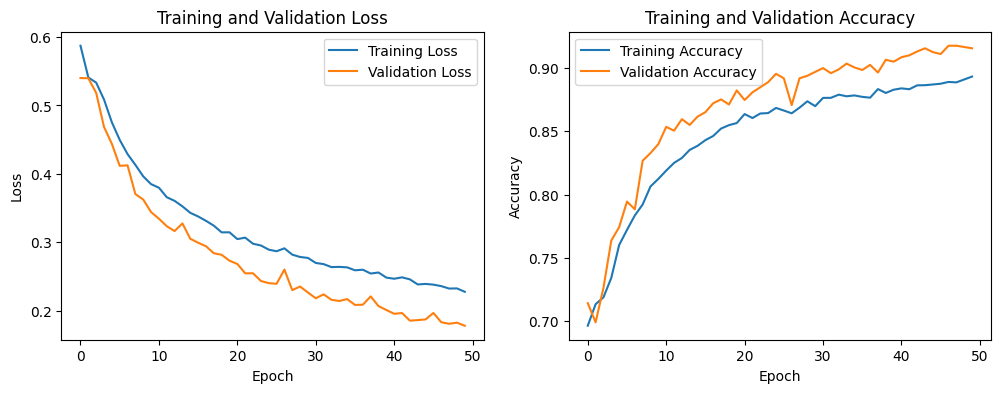

6/6 [==============================] - 0s 50ms/step - loss: 0.1778 - binary_accuracy: 0.9157
Validation Loss: 0.17780423164367676
Validation Accuracy: 0.915656566619873


In [30]:
import matplotlib.pyplot as plt

# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the validation data
eval_metrics = model.evaluate(vec_data_val, label_data_val)
print("Validation Loss:", eval_metrics[0])
print("Validation Accuracy:", eval_metrics[1])


In [31]:
# Lưu mô hình vào một tệp
model.save('my_model.h5')

B:\python\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Đường dẫn đến mô hình đã lưu
model_path = 'my_model.h5'

# Load mô hình đã lưu
model = load_model(model_path)

# Hàm để dự đoán cảm xúc từ chuỗi nhập từ bàn phím
def predict_emotion(input_text):
    # Tokenize và chuẩn bị dữ liệu đầu vào
    tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
    tokenizer.fit_on_texts([input_text])
    tokenized_text = tokenizer.texts_to_sequences([input_text])
    input_data = pad_sequences(tokenized_text, padding='post', maxlen=250)

    # Dự đoán
    predictions = model.predict(input_data)

    # Hiển thị kết quả
    label_class = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust', 'neutral']
    for i in range(len(label_class)):
        print(f"{label_class[i]}: {predictions[0][i]:.2f}")

# Nhập chuỗi từ bàn phím
input_text = input("Nhập chuỗi văn bản: ")

# Dự đoán cảm xúc
predict_emotion(input_text)


Nhập chuỗi văn bản:  i sad


1/1 [==============================] - 2s 2s/step
anger: 0.00
anticipation: 0.16
disgust: 0.00
fear: 0.01
joy: 0.96
love: 0.01
optimism: 0.03
pessimism: 0.02
sadness: 0.01
surprise: 0.06
trust: 0.01
neutral: 0.00


In [10]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, GlobalMaxPool1D, Dropout, Dense, Input, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_sentences(df):
    reviews = []
    lemmatizer = WordNetLemmatizer()

    for sent in tqdm(df['text']):
        # Remove HTML content
        review_text = BeautifulSoup(sent, "html.parser").get_text()
        
        # Remove non-alphabetic characters and convert to lowercase
        review_text = re.sub("[^a-zA-Z]", " ", review_text).lower()
    
        # Tokenize the sentences
        words = word_tokenize(review_text)
    
        # Remove stop words
        words = [word for word in words if word not in stop_words]
    
        # Lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(word) for word in words]
    
        reviews.append(lemma_words)

    return reviews

# Load data
df_train = pd.read_csv('data/nlp_train.csv')
df_valid = pd.read_csv('data/nlp_valid.csv')
df_test = pd.read_csv('data/nlp_test.csv')

# Preprocess text data
df_train['text'] = clean_sentences(df_train)
df_valid['text'] = clean_sentences(df_valid)

# Drop NaN values
df_train = df_train.dropna(subset=['text'])
df_valid = df_valid.dropna(subset=['text'])

# Tokenizer and Padding
input_data_train = df_train['text']
input_data_val = df_valid['text']

tokenizer_data = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer_data.fit_on_texts(input_data_train)

tokenized_data_train = tokenizer_data.texts_to_sequences(input_data_train)
vec_data_train = pad_sequences(tokenized_data_train, padding='post', maxlen=250)

tokenized_data_val = tokenizer_data.texts_to_sequences(input_data_val)
vec_data_val = pad_sequences(tokenized_data_val, padding='post', maxlen=250)

data_vocab_size = len(tokenizer_data.word_index) + 1
print("Input vector training: ", vec_data_train.shape)
print("Input vector val: ", vec_data_val.shape)
print("Vocabulary size: ", data_vocab_size)

# Define labels
label_class = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust', 'neutral']
label_data_train = df_train[label_class].values
label_data_val = df_valid[label_class].values

# Build the model
dropout_threshold = 0.4
model = Sequential()
input_dim = data_vocab_size
output_dim = 60
input_length = 250

model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))
model.add(Bidirectional(LSTM(units=output_dim, dropout=dropout_threshold, return_sequences=True), merge_mode='concat'))
model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(50, activation='relu'))
model.add(Dense(12, activation='sigmoid'))

adam = Adam(learning_rate=0.001)
binary_accuracy = tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=[binary_accuracy])
model.summary()

# Train the model
history = model.fit(
    x=vec_data_train, y=label_data_train,
    epochs=50,
    validation_data=(vec_data_val, label_data_val)
)


TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates